<h1> Standard run </h1>

This code example shows the computation of the covariance matrix spectral width, using the covariance matrix spectral width, over longer time periods. This involves calculating the spectral width in shorter time windows (currently hard-coded to be 6 hour chunks), and then combining these when plotting.

<h2> Computing spectral width </h2>

Code starts by pulling in functions from the file covseisnetfunc.py. From this file, two primary functions are used. The first, run_covseisnet(), is responsible for the bulk of the computation, computing the spectral width between two dates for a given dataset, and saves the output as numpy arrays. The second, plotSpectralWidth(), plots this data (excuse the lack of consistency in naming convention!).

In [1]:
from covseisnetfunc import *

The function run_covseisnet() is responsible for computing the covariance matrix spectral width. It requires five arguments. 

The first is the location where data is stored. At the moment, it is expecting data in SDS format (YEAR/NET/STA/CHAN.TYPE/NET.STA.LOC.CHAN.TYPE.YEAR.DAY). This can be seen in the function getDayWaveform(), used to read all data for a given day, for all channels and stations required, into an arraystream object. Other formats/structure to data will probably require modification of this function. 

The second is the channels of interest, where it will pull all traces corresponding to this channel. The third and fourth argument are the start and end date ('YYYY-MM-DD' format). The final compulsary argument is the output directory for covariance matrix, which stores the output for a given day as a numpy array. This will contain the times, frequencies, spectral width, and station/trace count.

Optional argument include the 'average', corresponding to the number of subwindows to average for the covariance matrix computation, and the 'window_duration_sec' corresponding to the length of these subwindows. The optional argument 'fs_target' corresponds to the frequency to resample to via decimation (default = 25). 

Optional argument 'stations' can be used to select which stations to use. By default this will be an empty array, and will compute spectral width using all stations in file. To use only certain stations, include these in array e.g. "stations = ['STAT1', 'STAT2']". If single-station, include only one station in array and set channel = '*' to compute using all channels. Also, you can decide whether to use onebit or smoothed method for temporal and spectoral normalisation during pre-processing using optional arguments 'norm' and 'spectral' (set to "onebit"(default) or "smooth"). Arguments freqmin and freqmax can be used to specific pre_processing bandpass filter (default 0.01 - 10 Hz). Finally, can set printstream = True as an optional argument to print the stream as output for each day (can be useful for checking issues).

In [4]:
data_location = '/media/yatesal/Elements/SeismicData/ruapehu'

startdate='2018-04-01'
enddate='2018-04-10'
component='HHZ'
stations=[] #list of stations to process (if empty, will use all in directory)
outputdir='TEST001'


#pre-processing params
norm='onebit' #None, onebit, or smooth
spectral='onebit' #as above
freqmin=0.01
freqmax=10
fs_target = 25  #resample freq

#spectral width computation params
window_duration_sec=100
average=100 #no. windows to average

In [ ]:
run_covseisnet(data_location, component, startdate, enddate, outputdir, average=average, window_duration_sec=window_duration_sec, fs_target=fs_target, norm=norm, spectral=spectral, freqmin=freqmin, freqmax=freqmax)

<h2> Plotting output </h2>

Function plotSpectralWidth() takes the directory where covseisnet results are stored as the first argument, and startdate and enddate as the second argument and third argument respectively. Optional arguments include 'log', a boolean to plot the frequencies as a logarithmic scale, and a boolean argument 'count' which will indicate whether the count of traces/stations is shown as a second plot underneath the spectral width plot. Optional boolean argument 'norm' can be used to normalize the spectral width (where the spectral width during each measurement window is divided by the maximum recorded across all frequencies. This can help with visualization when trace count is changing a lot). Optional arguments vmin and vmax can be used to adjust the range shown by the colorbar (set to None by default).

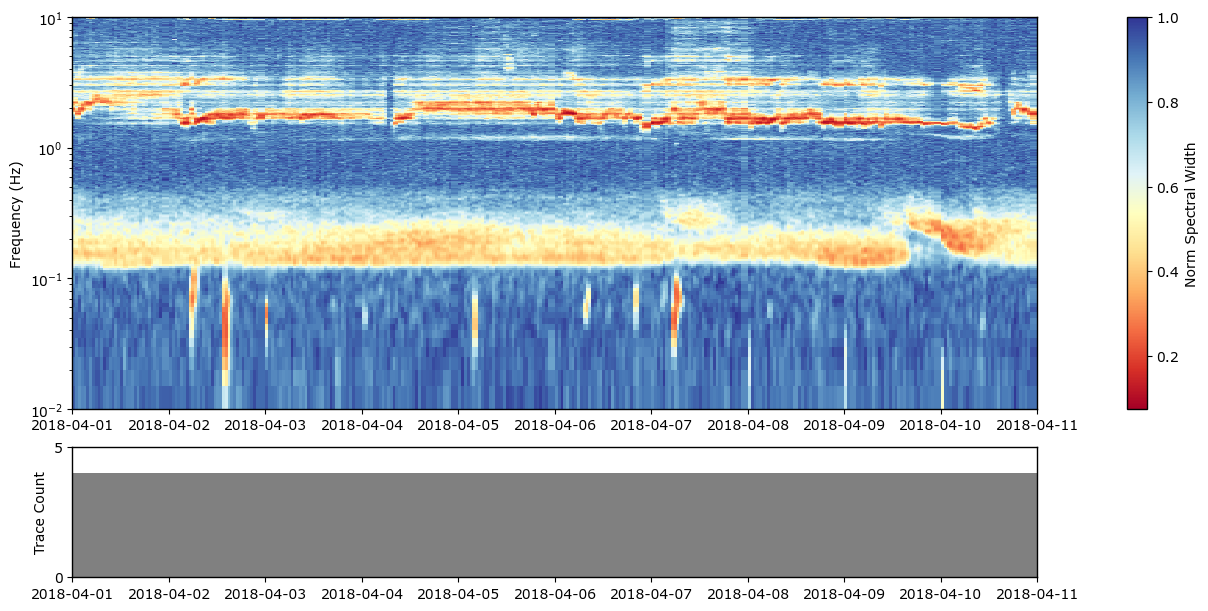

In [5]:
log = True #log scale
count = True #show no. of traces
norm = True #normalize spectral width (can improve visual presentation if variable trace count)
vmin = None #set minimum value in plot
vmax = None #set max value in plot
downsamp = 5 #option downsample (to avoid memory issues with long datasets, 1=no downsample)

plotSpectralWidth(outputdir, startdate, enddate, log=log, count=count, norm=norm, vmin=vmin, vmax=vmax, downsamp=downsamp)

Optional arguments fig and ax (default = None) can be used if defining plot outside of function (if wanting more flexibility with plotting). Note, trace count has to be plotted separately with different function. Also can see effect of not normalizing when trace count varies through time.

In [6]:
fig, ax = plt.subplots(2,1, figsize=(12,6), constrained_layout=True, gridspec_kw={'height_ratios': [3,1]} )

plotSpectralWidth(outputdir, startdate, enddate, log=log, count=count, norm=norm, fig=fig, ax=ax[0])
plotTraceCount(outputdir, startdate, enddate, fig=fig, ax=ax[1])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (40,) and arg 1 with shape (10,).

<h2> Single-station processing </h2>

Now we can adjust the optional argument 'stations', and set the channel argument to '*' to process single-station only. Note, we could process only certain stations in a similar way by listing stations we want to process in the stations array.

In [ ]:
stations=['MAVZ']
component='*'
startdate = '2018-05-01'
enddate = '2018-05-10'
outputdir='TEST002'

run_covseisnet(data_location, component, startdate, enddate, outputdir, average=average, window_duration_sec=window_duration_sec, stations=stations, dfac=dfac)

In [ ]:
plotSpectralWidth(outputdir, startdate, enddate, log=True, count=True)